# 1 Load Libraries and Datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
train = pd.read_csv('data/train_after_missing_value.csv')
# test = pd.read_csv('data/test_after_missing_value.csv')

C:\Users\18025\AppData\Local\Temp\ipykernel_22096\881063152.py:1: DtypeWarning: Columns (260,261,263,264) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/train_after_missing_value.csv')


# 2 Finding Outliers
## 2.1 IQR Score Method

In [ ]:
n = (train.dtypes != 'object')
num_train_cols = list(n[n].index) # a list of numerical features of train

In [5]:
train_mean = train.mean()
train_std = train.std()

C:\Users\18025\AppData\Local\Temp\ipykernel_22096\2147949435.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_mean = train.mean()
C:\Users\18025\AppData\Local\Temp\ipykernel_22096\2147949435.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_std = train.std()


In [11]:
train.shape

(590540, 290)

In [6]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0            2.952695e+05
TransactionID         2.952695e+05
isFraud               0.000000e+00
TransactionDT         8.219562e+06
TransactionAmt        8.168750e+01
                          ...     
id_37_T               0.000000e+00
id_38_F               1.000000e+00
id_38_T               1.000000e+00
DeviceType_desktop    1.000000e+00
DeviceType_mobile     1.000000e+00
Length: 285, dtype: float64


In [7]:
print((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR)))

C:\Users\18025\AppData\Local\Temp\ipykernel_22096\3987690789.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR)))


           C1    C10    C11    C12    C13    C14     C2     C3     C4     C5  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False   True  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
590535  False  False  False  False  False  False  False  False  False  False   
590536  False  False  False  False  False  False  False  False  False  False   
590537  False  False  False  False  False  False  False  False  False  False   
590538  False  False  False   True  False  False  False  False  False  False   
590539  False  False  False  False  False  False  False  False  False  False   

        ...  id_34_match_status:2  id_3

In [8]:
train_outlier_IQR = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\18025\AppData\Local\Temp\ipykernel_22096\3451797749.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train_outlier_IQR = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]


In [9]:
train_outlier_IQR.shape

(16966, 290)

In [10]:
train_outlier_IQR = train_outlier_IQR.reset_index()
del train_outlier_IQR['index']
train_outlier_IQR

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile
0,44,2987044.0,0.0,87266.0,39.500000,9281.0,555.0,150.0,195.0,472.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,54,2987054.0,0.0,87401.0,34.000000,18370.0,547.0,150.0,226.0,191.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,128,2987128.0,0.0,88589.0,57.937500,4106.0,543.0,150.0,224.0,315.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,166,2987166.0,0.0,89147.0,26.500000,11919.0,170.0,150.0,224.0,264.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,242,2987242.0,0.0,90244.0,24.953125,2019.0,369.0,150.0,224.0,299.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16961,590315,3577315.0,0.0,15806267.0,117.000000,9186.0,300.0,150.0,224.0,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16962,590389,3577389.0,0.0,15808119.0,24.500000,12932.0,361.0,150.0,226.0,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16963,590403,3577403.0,0.0,15808482.0,59.000000,8414.0,253.0,150.0,224.0,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16964,590424,3577424.0,0.0,15809056.0,24.500000,2884.0,490.0,150.0,226.0,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_outlier_IQR.describe()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile
count,16966.000000,1.696600e+04,16966.0,1.696600e+04,16966.000000,16966.000000,16966.000000,16966.0,16966.000000,16966.000000,...,647.000000,647.000000,647.0,647.0,647.0,647.0,647.000000,647.000000,647.000000,647.000000
mean,337617.800071,3.324618e+06,0.0,8.438022e+06,83.085653,9995.313156,348.023962,150.0,200.801380,284.358776,...,0.661515,0.338485,1.0,0.0,0.0,1.0,0.584235,0.415765,0.819165,0.180835
std,131722.424602,1.317224e+05,0.0,3.689809e+06,54.550550,4820.019070,153.243718,0.0,38.804496,95.455591,...,0.473561,0.473561,0.0,0.0,0.0,0.0,0.493235,0.493235,0.385179,0.385179
min,44.000000,2.987044e+06,0.0,8.726600e+04,5.000000,1030.000000,100.000000,150.0,100.000000,110.000000,...,0.000000,0.000000,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,234012.250000,3.221012e+06,0.0,5.531528e+06,44.500000,6530.000000,206.000000,150.0,166.000000,204.000000,...,0.000000,0.000000,1.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000
50%,326630.500000,3.313630e+06,0.0,8.038702e+06,59.000000,9992.000000,350.000000,150.0,226.000000,272.000000,...,1.000000,0.000000,1.0,0.0,0.0,1.0,1.000000,0.000000,1.000000,0.000000
75%,438292.000000,3.425292e+06,0.0,1.110953e+07,114.937500,13906.000000,490.000000,150.0,226.000000,327.000000,...,1.000000,1.000000,1.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,0.000000
max,590480.000000,3.577480e+06,0.0,1.580997e+07,247.000000,18395.000000,600.000000,150.0,229.000000,502.000000,...,1.000000,1.000000,1.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000


## 2.2 Box Plot
### 2.2.1 Boxplot of Initial Data

<AxesSubplot:>

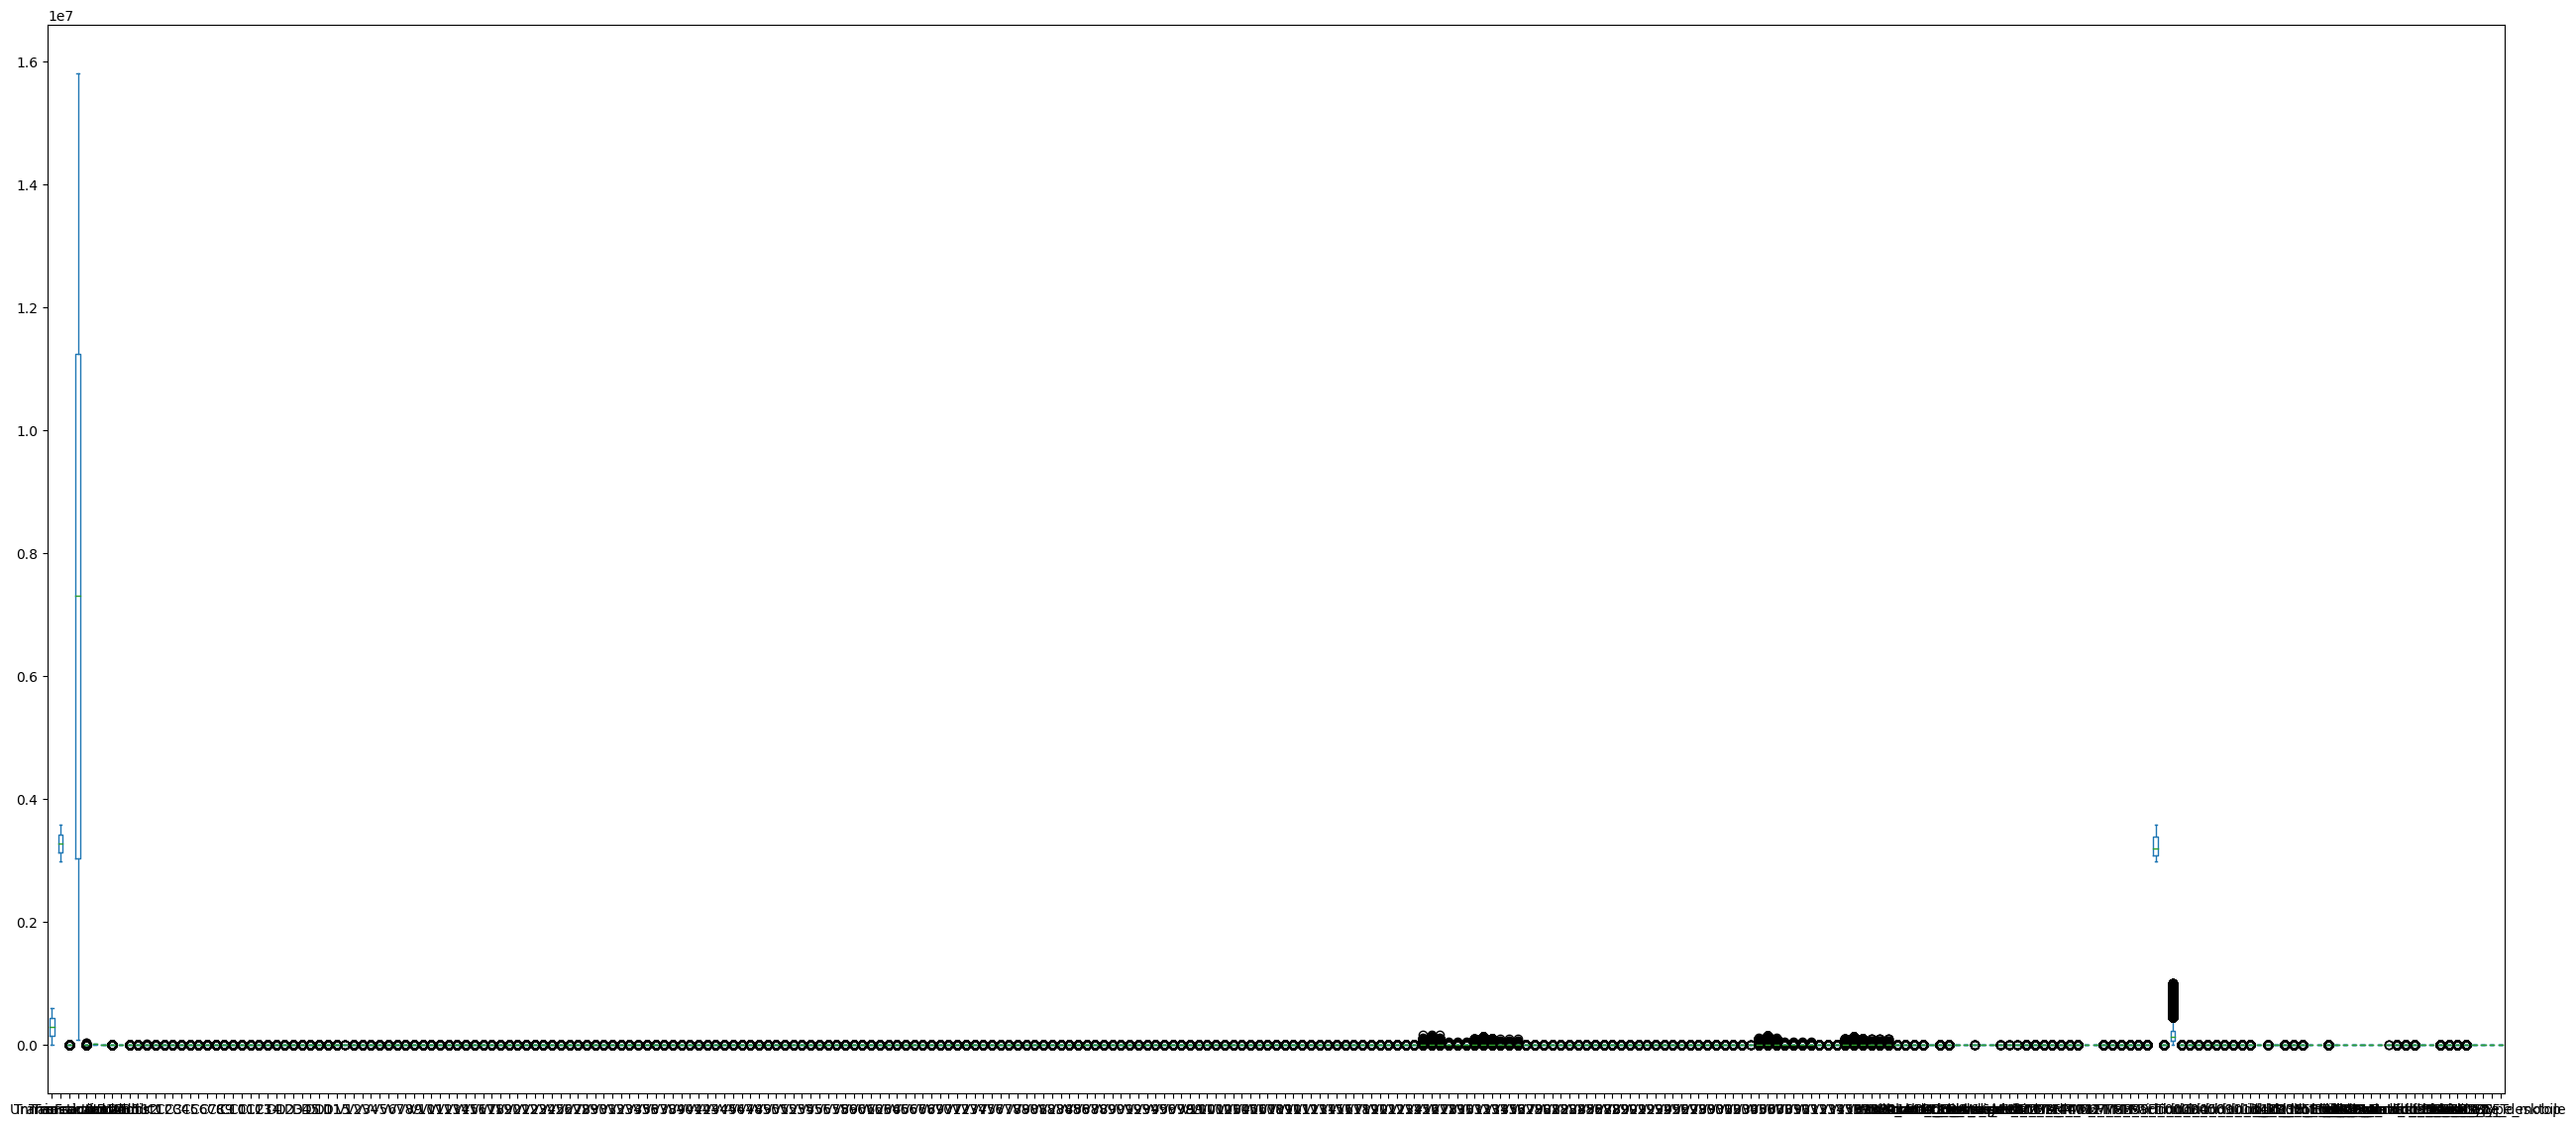

In [13]:
train.plot(x=train.index.name, kind='box', figsize=(32, 14))

### 2.2.2 Boxplot of Dropped Outlier Data

<AxesSubplot:>

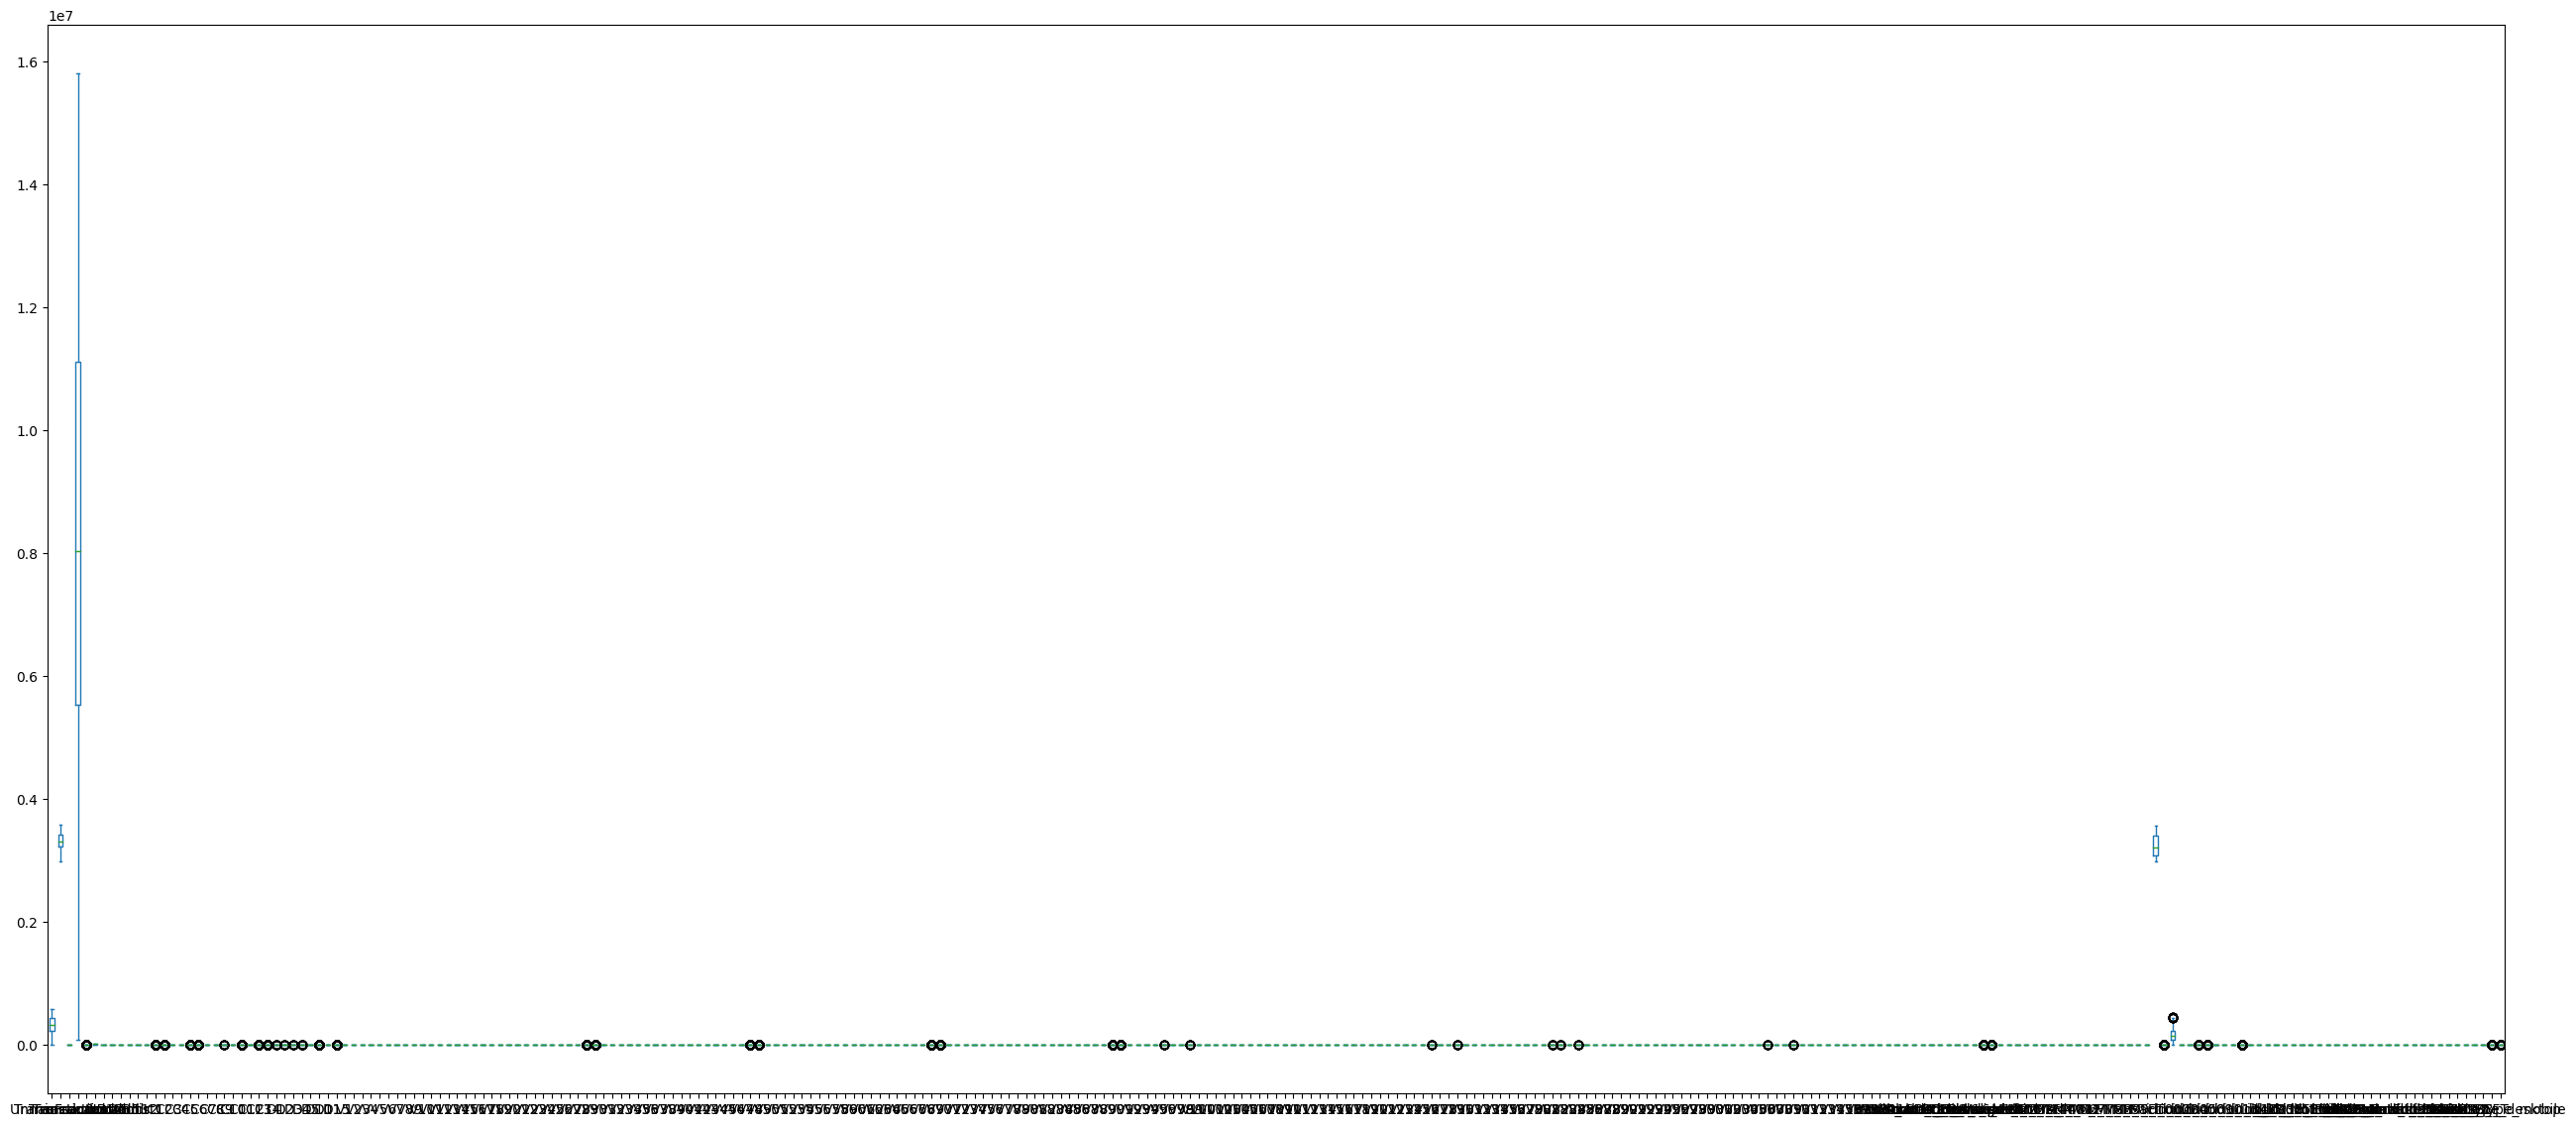

In [15]:
train_outlier_IQR.plot(x=train_outlier_IQR.index.name, kind='box', figsize=(32, 14))